# Random Order- and SKU generators

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skewnorm
from datetime import datetime
from scipy.stats import pareto
import uuid
from bisect import bisect
import random

%matplotlib inline

---

## Random SKU table generation

### Objectives
Generate a table with unique SKUs that have randomly generated values. The number of records can be chosen by the user.

The initial table must contain at minimum the following columns:

| SKU ID | Category | Length | Width | Height | Weight |
| ---- | ---- | ---- | ---- | ---- | ---- |
| categorical | categorical | numerical | numerical | numerical | numerical |

Goals in detail:
- Develop basic method to generate a table of randomly created SKUs with the above features

In [2]:
dict_products = pd.read_excel('Product_list.xls').set_index('Category').to_dict(orient='index')
dict_products

{'Shirt': {'Length_S': 350,
  'Length_M': 375,
  'Length_L': 400,
  'Width_S': 200,
  'Width_M': 220,
  'Width_L': 250,
  'Height_S': 10,
  'Height_M': 12,
  'Height_L': 15},
 'Pants': {'Length_S': 400,
  'Length_M': 450,
  'Length_L': 500,
  'Width_S': 250,
  'Width_M': 275,
  'Width_L': 300,
  'Height_S': 15,
  'Height_M': 18,
  'Height_L': 21},
 'Socks': {'Length_S': 100,
  'Length_M': 110,
  'Length_L': 120,
  'Width_S': 75,
  'Width_M': 77,
  'Width_L': 80,
  'Height_S': 5,
  'Height_M': 5,
  'Height_L': 5},
 'Box of cereals': {'Length_S': 250,
  'Length_M': 250,
  'Length_L': 250,
  'Width_S': 150,
  'Width_M': 150,
  'Width_L': 150,
  'Height_S': 10,
  'Height_M': 10,
  'Height_L': 10},
 'Can of tuna': {'Length_S': 110,
  'Length_M': 110,
  'Length_L': 110,
  'Width_S': 110,
  'Width_M': 110,
  'Width_L': 110,
  'Height_S': 7,
  'Height_M': 7,
  'Height_L': 7},
 'Bag of rice': {'Length_S': 540,
  'Length_M': 540,
  'Length_L': 540,
  'Width_S': 350,
  'Width_M': 350,
  'Width_L'

In [3]:
def random_dim_generator(df, dim):
    '''
    Function to calculating a random value by looking up a start value and applying a normal distribution
    Inputs:
    - Dataframe
    - Dimension type (L, W, H)
    Output:
    - Value, rounded to 0 digits
    '''
    SCALE = 0.1
    mean = df.apply(lambda row: dict_products[row.Category][dim + '_' + row.Size], axis=1)
    return np.round(abs(np.random.normal(loc=mean, scale=mean * SCALE)))

In [4]:
def random_skus(articles, vertical):
    '''Main function to generate a SKU table
    Inputs:
    - Number of desired SKUs
    - Market sector (vertical)
    Outputs:
    - SKU table'''

    FEATURE_LIST = ['SKU ID', 'Category', 'Size', 'Length', 'Width', 'Height']
    SIZE_LIST = ['S', 'M', 'L']
    PRODUCT_DESC_LIST = {
        'Fashion': ['Shirt', 'Pants', 'Socks'],
        'Food': ['Box of cereals', 'Can of tuna', 'Bag of rice'],
        'Durable':['Toolbox', 'Box of nails', 'Glue gun']
        }

    sku_table_df = pd.DataFrame(1, index=np.arange(articles), columns=FEATURE_LIST) 

    sku_table_df['SKU ID'] = sku_table_df.index.map(lambda x: 'SKU-' + str(x+1))
    sku_table_df['Category'] = sku_table_df['Category'].map(lambda x: np.random.choice(PRODUCT_DESC_LIST[vertical]))
    sku_table_df['Size'] = sku_table_df['Size'].map(lambda x: np.random.choice(SIZE_LIST))

    for dim in ['Length', 'Width', 'Height']:
        sku_table_df[dim] = random_dim_generator(sku_table_df, dim)

    return sku_table_df

In [5]:
df_skus_fashion = random_skus(10000, 'Fashion')

In [6]:
df_skus_fashion

,SKU ID,Category,Size,Length,Width,Height
0,SKU-1,Pants,S,413.0,260.0,17.0
1,SKU-2,Socks,L,144.0,78.0,5.0
2,SKU-3,Socks,M,124.0,91.0,5.0
3,SKU-4,Shirt,L,399.0,215.0,17.0
4,SKU-5,Pants,S,430.0,263.0,16.0
...,...,...,...,...,...,...
9995,SKU-9996,Socks,S,107.0,79.0,4.0
9996,SKU-9997,Socks,S,93.0,80.0,5.0
9997,SKU-9998,Socks,M,104.0,59.0,5.0
9998,SKU-9999,Socks,L,127.0,88.0,4.0


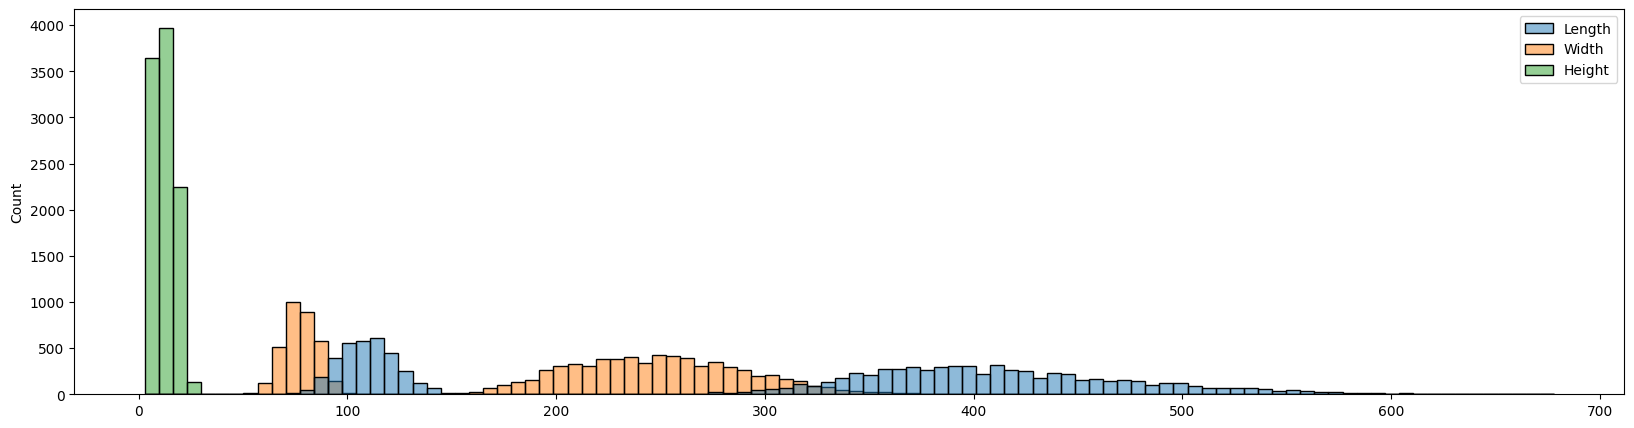

In [7]:
plt.figure(figsize=(20, 5))
sns.histplot(df_skus_fashion[['Length', 'Width', 'Height']], bins=100);

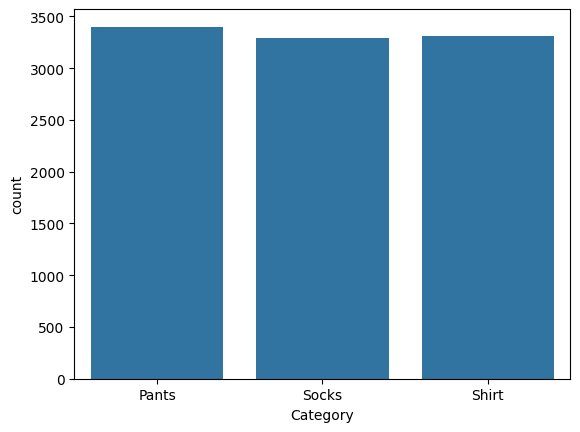

In [8]:
# Visual check if distribution appears uniform random
sns.countplot(x=df_skus_fashion['Category']);

In [9]:
df_skus_fashion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SKU ID    10000 non-null  object 
 1   Category  10000 non-null  object 
 2   Size      10000 non-null  object 
 3   Length    10000 non-null  float64
 4   Width     10000 non-null  float64
 5   Height    10000 non-null  float64
dtypes: float64(3), object(3)
memory usage: 507.8+ KB


In [10]:
df_skus_fashion.describe()

,Length,Width,Height
count,10000.000000,10000.000000,10000.000000
mean,313.098600,192.930200,11.840000
std,152.131704,87.913711,5.804685
min,72.000000,51.000000,3.000000
25%,119.000000,83.000000,5.000000
50%,366.000000,219.000000,12.000000
75%,426.000000,263.000000,16.000000
max,678.000000,392.000000,27.000000


In [11]:
df_skus_food = random_skus(1000, 'Food')
df_skus_food

,SKU ID,Category,Size,Length,Width,Height
0,SKU-1,Box of cereals,M,268.0,133.0,9.0
1,SKU-2,Can of tuna,M,112.0,119.0,6.0
2,SKU-3,Can of tuna,S,108.0,107.0,7.0
3,SKU-4,Bag of rice,M,538.0,382.0,224.0
4,SKU-5,Can of tuna,S,126.0,107.0,6.0
...,...,...,...,...,...,...
995,SKU-996,Box of cereals,S,294.0,140.0,9.0
996,SKU-997,Box of cereals,M,233.0,174.0,10.0
997,SKU-998,Can of tuna,M,102.0,102.0,7.0
998,SKU-999,Box of cereals,L,275.0,121.0,9.0


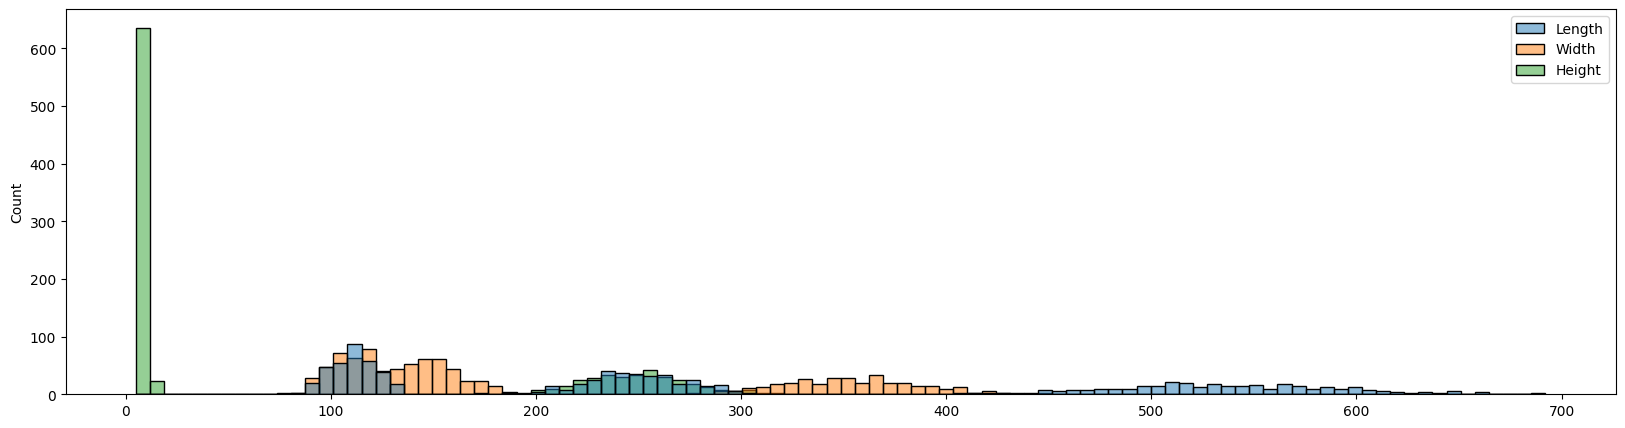

In [12]:
plt.figure(figsize=(20, 5))
sns.histplot(df_skus_food[['Length', 'Width', 'Height']], bins=100);

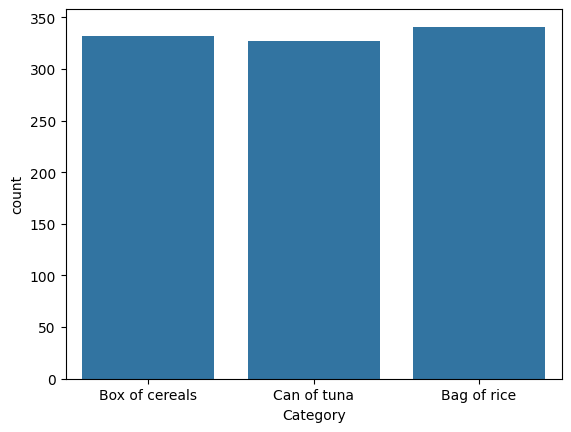

In [13]:
sns.countplot(x=df_skus_food['Category']);

### Notes
At this stage, the produced values are only to showcase the functionality and are not representative of real world data.
At a later time, more realistic data needs to be produced.

---

## Random order table generator

### Considerations
Like in most other ares in business, the SKU-velocity distribution in a typical order profil corresponds to an 80/20, or in some cases 70/30, ratio (20% of the SKUs representing 80% of the order volume.). Based on this, SKUs will belong to velocity classes (A, B, C), depending how fast they are moving. Therefore, the available SKUs need to be assigned orders in a way that follows this rule.

<img src="https://interlakemecalux.cdnwm.com/blog/img/80-20-pareto-principle.1.2.jpg" width="650"/>

There is a specific, somewhat business-specific, order profile (units per-order line and order lines per order).

Ultimately, there must be a selection of order profiles that go in line with different market segments and business types.

### Objectives
The goal is to create a function that generates a table of random orders. The order profile (units per order line, order lines per order) as well as the volume distribution of the SKUs (Pareto principle) must represent a real live scenario and must be adjustable by the user.

The initial table must contain at minimum the following columns:

| Date | Order ID | SKU ID | Quantity |
| ---- | ---- | ---- | ---- |
| numerical | categorical | categorical | numerical |

#### Steps in detail
1) Define range of days based on user input
2) Assign random number of orders to each day while assigning a number of order lines (SKUs) - for the beginning random, normal, right skewed
3) Develop method to randomly distribute SKUs across all orders - for the beginning randomly, based on 80/20 rule
4) Creating the order line pool
5) Putting all together

---
#### 1. Define range of days

In [14]:
def day_definer(num):
    '''
    Function to create a list of days. First day of range is current day
    Input:
    - Number of days
    Outbout:
    - List of days in the range of first day to last day
    '''

    return pd.date_range(datetime.today(), periods=num).date.tolist()

In [15]:
lst_days = day_definer(90)
lst_days

[datetime.date(2024, 1, 28),
 datetime.date(2024, 1, 29),
 datetime.date(2024, 1, 30),
 datetime.date(2024, 1, 31),
 datetime.date(2024, 2, 1),
 datetime.date(2024, 2, 2),
 datetime.date(2024, 2, 3),
 datetime.date(2024, 2, 4),
 datetime.date(2024, 2, 5),
 datetime.date(2024, 2, 6),
 datetime.date(2024, 2, 7),
 datetime.date(2024, 2, 8),
 datetime.date(2024, 2, 9),
 datetime.date(2024, 2, 10),
 datetime.date(2024, 2, 11),
 datetime.date(2024, 2, 12),
 datetime.date(2024, 2, 13),
 datetime.date(2024, 2, 14),
 datetime.date(2024, 2, 15),
 datetime.date(2024, 2, 16),
 datetime.date(2024, 2, 17),
 datetime.date(2024, 2, 18),
 datetime.date(2024, 2, 19),
 datetime.date(2024, 2, 20),
 datetime.date(2024, 2, 21),
 datetime.date(2024, 2, 22),
 datetime.date(2024, 2, 23),
 datetime.date(2024, 2, 24),
 datetime.date(2024, 2, 25),
 datetime.date(2024, 2, 26),
 datetime.date(2024, 2, 27),
 datetime.date(2024, 2, 28),
 datetime.date(2024, 2, 29),
 datetime.date(2024, 3, 1),
 datetime.date(2024, 3, 

#### 2. Assign random number of orders per day
Each day needs to get a number of orders assigned.

The number of orders per day needs to be randomized as well when assigning orders for a range of days.

In [70]:
def order_generator(avg_orders_per_day, avg_lines_order, order_std, min_order_size):
    '''
    Function to generate an array with random length where each number in that array represents one order with order lines.
    The random assignment of the number of orders as well as the number of order lines follow a normal distribution.
    Inputs:
    - average orders per day
    - average order lines per order
    - standard deviaton (scale) of an order
    - minimum order size
    Output:
    - array with numbers
    '''
    # daily_orders = 100
    daily_order_count = np.round(abs(np.random.normal(loc=avg_orders_per_day, scale=50, size=1))).astype(int)
    return (np.round(abs(np.random.normal(loc=avg_lines_order, scale=order_std, size=daily_order_count))) + min_order_size).astype(int)

In [69]:
test_orders = order_generator(100, 30, 10, 3)
test_orders

array([32, 27, 28, 31, 18, 18, 20, 35, 27, 25, 22, 34, 38, 41, 29, 35, 29,
       28, 38, 32, 23, 36, 40,  9, 27, 26, 33, 41, 43, 43, 45, 26, 22, 35,
       38, 38, 31, 39, 21,  9,  6, 33, 35, 30, 31, 24, 41, 34, 27, 28, 55,
       36, 26, 37, 36, 37, 32, 27, 29, 43, 35, 36, 18, 21, 24, 20, 38, 38,
       23,  9, 37, 24, 38, 36, 52, 15, 39, 44, 26, 35, 34, 23, 41, 37, 15,
       46, 35, 31,  5, 30, 25, 23, 37, 24, 38, 28, 29, 46, 34, 23, 28, 31,
       58, 19, 41, 25, 55, 35, 46, 32, 34, 29, 27, 27, 26, 33, 29, 48, 45,
       23, 43, 41, 33, 38, 37, 28, 27, 29, 26, 30, 36, 28, 20, 21, 29, 41,
       39, 39, 41, 17, 17, 53, 24, 40, 31])

(array([1., 1., 0., 0., 3., 0., 0., 0., 0., 0., 2., 0., 2., 3., 1., 3., 3.,
        2., 6., 5., 3., 6., 8., 7., 8., 3., 6., 4., 4., 5., 8., 6., 6., 9.,
        4., 2., 8., 0., 4., 1., 2., 3., 0., 1., 0., 0., 0., 1., 1., 0., 2.,
        0., 1.]),
 array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
        18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
        31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
        44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
        57., 58.]),
 <BarContainer object of 53 artists>)

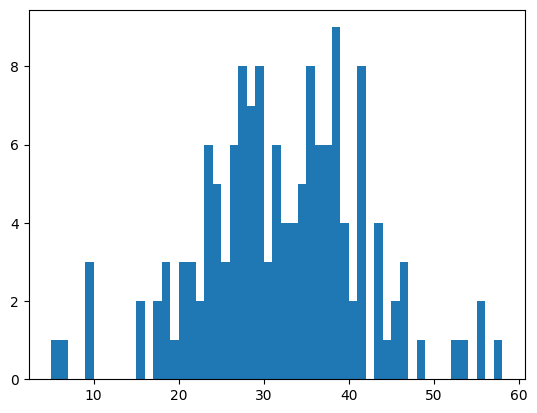

In [71]:
# Plot:
axis = np.arange(start=min(test_orders), stop = max(test_orders) + 1)
plt.hist(test_orders, bins = axis)

In [72]:
len(test_orders)

145

#### 3. Assigning SKUs
The assignment of SKUs may be random, but each SKU will need to have a different velocity, basically how often it is picked during the day. As stated, this distribution will follow the 80/20 rule.

First, a pareto distribution of n SKUs with distinct values need to be produced. N is the number of SKUs, and the dependend values represent the number of order lines each SKU is picked during the day.
In the next step each SKU will then be translated to a unique identifier (SKU ID), multiplied by the number of order lines it produces during the day, and then be put into a SKU list. This SKU list represents a pool from which order lines can be randomly pulled when a procedure loops throuh all the orders. Because the appearance of SKUs in the list is varying (based on the pareto principle) probability will naturally reproduce the pareto distribution when the oder list is generated.

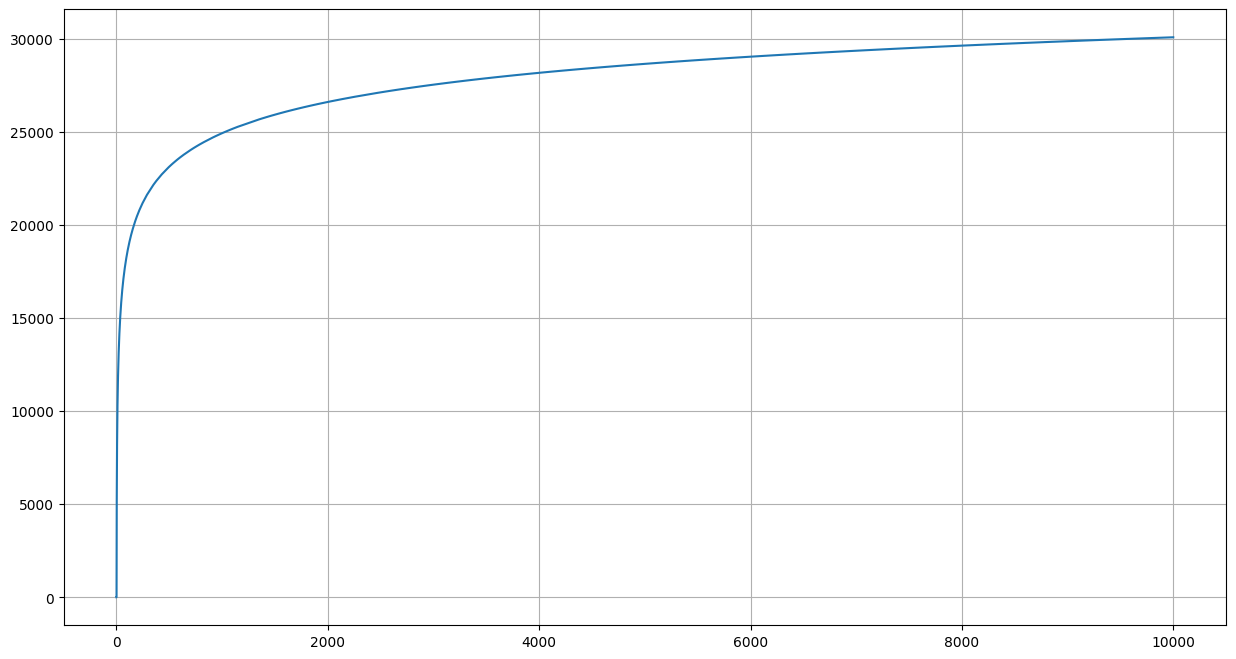

In [105]:
# Let's review the cumulative density function of the pareto distribution. We will use scipy's pareto library.
num_skus = 10000

x = np.arange(1, num_skus)

pareto_cdf = (pareto.cdf(x, b=0.1, loc=1, scale=1) * 50000).round()

plt.figure(figsize=(15, 8))
plt.plot(x, pareto_cdf)
plt.grid()
plt.show()

In [21]:
pareto_cdf.mean()

27881.72297229723

This distribution could represent a day in a distribution center. It is very steep in this example and shows how 10,000 SKUs adding adding up to 30,000 order lines. The fastest SKUs are on the left side of the X-axis and generate the biggest part of the order volume. We need the derivation of this function (probability density function) in order to directly get the individual impacts of each SKU.

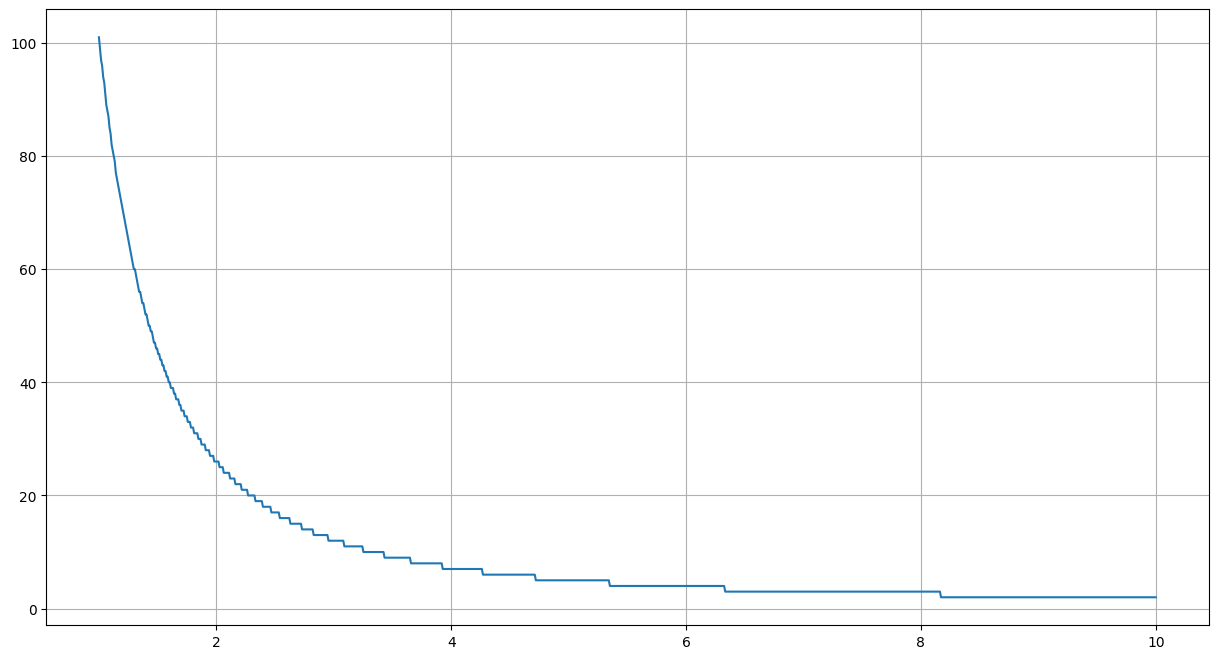

In [20]:
# Let's try spipy's pdf funtion
min_lines = 1
lines_range_factor = 100

x = np.linspace(1, 10, 1000)

pareto_pdf = (pareto.pdf(x, b=1, loc=0, scale=1) * lines_range_factor + min_lines).round()

plt.figure(figsize=(15, 8))
plt.plot(x, pareto_pdf)
plt.grid()
plt.show()

In [21]:
# Make a function that randomly creates a number of lines from that distribution:

def random_line_assigner(min_lines, lines_range):
    return int(np.random.choice((pareto.pdf(x, b=1, loc=0, scale=1) * lines_range)))

In [22]:
# generate 1000 samples for testing if distribution will be reflected
df_fashion_skus = random_skus(10000, 'Fashion')
min_lines = 1
lines_range = 100

df_fashion_skus['Lines'] = np.random.choice((pareto.pdf(x, b=1, loc=0, scale=1) * lines_range).round(), df_fashion_skus.shape[0])


In [23]:
df_fashion_skus

,SKU ID,Category,Size,Length,Width,Height,Lines
0,SKU-1,Pants,M,482.0,302.0,17.0,16.0
1,SKU-2,Pants,L,449.0,352.0,20.0,9.0
2,SKU-3,Socks,S,104.0,81.0,4.0,5.0
3,SKU-4,Pants,M,497.0,268.0,18.0,15.0
4,SKU-5,Shirt,M,430.0,176.0,11.0,7.0
...,...,...,...,...,...,...,...
9995,SKU-9996,Shirt,M,307.0,208.0,12.0,2.0
9996,SKU-9997,Socks,L,142.0,93.0,5.0,8.0
9997,SKU-9998,Pants,S,413.0,240.0,15.0,1.0
9998,SKU-9999,Pants,L,483.0,292.0,21.0,1.0


In [24]:
# For the pareto distrubution to appear the dataframe needs to be sorted by the order lines and then a cumulative lines column needs to be added
# Sorting by velocity
df_fashion_skus.sort_values('Lines', ascending=False, inplace=True)
# Cumulate values
df_fashion_skus['Cumulative Lines'] = np.cumsum(df_fashion_skus['Lines'])
# Resetting index for the visualization
df_fashion_skus.reset_index(drop=True, inplace= True)

In [25]:
df_fashion_skus

,SKU ID,Category,Size,Length,Width,Height,Lines,Cumulative Lines
0,SKU-7207,Shirt,L,355.0,248.0,17.0,100.0,100.0
1,SKU-5003,Socks,S,94.0,80.0,5.0,100.0,200.0
2,SKU-6125,Pants,M,421.0,257.0,18.0,100.0,300.0
3,SKU-99,Pants,M,541.0,246.0,18.0,100.0,400.0
4,SKU-2914,Pants,S,427.0,218.0,15.0,100.0,500.0
...,...,...,...,...,...,...,...,...
9995,SKU-6055,Socks,M,103.0,73.0,4.0,1.0,101141.0
9996,SKU-863,Shirt,L,387.0,277.0,17.0,1.0,101142.0
9997,SKU-6059,Socks,S,87.0,83.0,5.0,1.0,101143.0
9998,SKU-6062,Shirt,S,363.0,212.0,10.0,1.0,101144.0


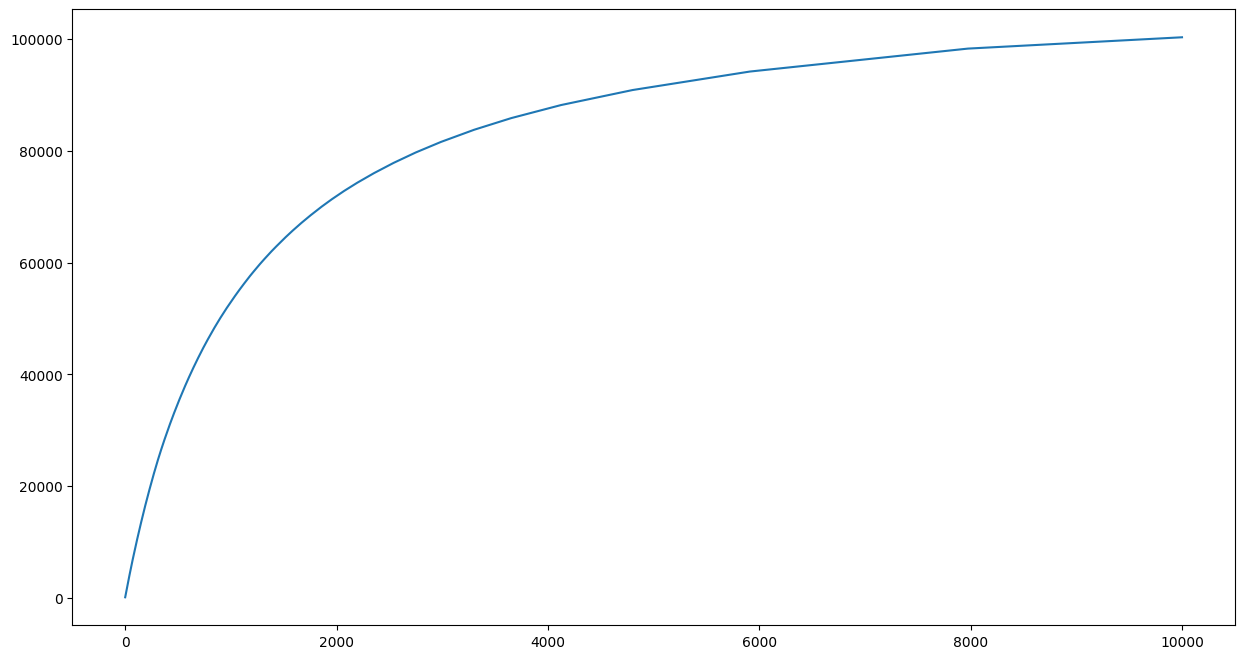

In [280]:
plt.figure(figsize=(15, 8))
plt.plot(df_fashion_skus['Cumulative Lines']);

That looks OK. This list of 1000 SKUs corresponds to a typical order profile. In a 3-shift operation that would lead to a capacity of 550 to 650 order lines/ h.

#### 4. Creating the order line pool
The goal is to have a pool of order lines. The number of appearances of SKUs in that pool must be in line their velocity (= "Order Lines"). For example, if a SKU was generated with 30 order lines it must appear 30 times in the pool. This is essential to maintain the pareto distribution. For every ordeline in the order list the algorithm will then chose randomly one sample from the pool.
Let's generate this pool.

##### SKU pool
SKUs will be picked randomly from the existing SKU list.
But some SKUs need to be picked more often, based on the higher velocity that is represented in the SKU profile (Pareto).
To simulate that higher probability to be selected, I will create a SKU pool that repeats the number of SKUs based on their assigned order lines.
This method was chosen in lack of knowledge about more sophisticated methods.

In [73]:
df_fashion_skus
      

,SKU ID,Category,Size,Length,Width,Height,Lines,Cumulative Lines
0,SKU-7207,Shirt,L,355.0,248.0,17.0,100.0,100.0
1,SKU-5003,Socks,S,94.0,80.0,5.0,100.0,200.0
2,SKU-6125,Pants,M,421.0,257.0,18.0,100.0,300.0
3,SKU-99,Pants,M,541.0,246.0,18.0,100.0,400.0
4,SKU-2914,Pants,S,427.0,218.0,15.0,100.0,500.0
...,...,...,...,...,...,...,...,...
9995,SKU-6055,Socks,M,103.0,73.0,4.0,1.0,101141.0
9996,SKU-863,Shirt,L,387.0,277.0,17.0,1.0,101142.0
9997,SKU-6059,Socks,S,87.0,83.0,5.0,1.0,101143.0
9998,SKU-6062,Shirt,S,363.0,212.0,10.0,1.0,101144.0


In [101]:
test_orders = order_generator(100, 3, 10, 3)

In [158]:
def generate_lines(orders):
  orders_pool = []
  idx = 0
  for i, lines in enumerate(orders):
    order_lines = {}
    for line in range(lines):
      sku = random.choices(df_fashion_skus['SKU ID'], weights=df_fashion_skus['Lines'])[0]
      qty = np.random.randint(1, 10)
      order_lines.update({line + 1: {'Order': 'Order-'+str(i + 1), 'SKU': sku, 'Quantity': qty}})
    orders_pool.append(order_lines)
  return orders_pool

In [110]:
# def generate_line_pool_2(orders):
    
#     FEATURE_LIST = ['Order ID', 'Line no', 'SKU', 'Quantity']
#     total_lines = sum(orders)
#     order_table_df = pd.DataFrame(columns=FEATURE_LIST)
#     # order_pool = []
#     # sku_pool = []

#     for i, lines in enumerate(orders):
#         for line in range(lines):
#             new_order_line = {'Order ID': 'Order-' + str(i+1), 'Line no': i+1, 'SKU': random.choices(df_fashion_skus['SKU ID'], weights=df_fashion_skus['Lines'])[0], 'Quantity': 1}
#             order_table_df.loc[i] = new_order_line

#     return order_table_df

In [159]:
order_pool = generate_lines(test_orders)

In [160]:
order_pool

[{1: {'Order': 'Order-1', 'SKU': 'SKU-7610', 'Quantity': 7},
  2: {'Order': 'Order-1', 'SKU': 'SKU-5981', 'Quantity': 7},
  3: {'Order': 'Order-1', 'SKU': 'SKU-8730', 'Quantity': 3},
  4: {'Order': 'Order-1', 'SKU': 'SKU-8131', 'Quantity': 6},
  5: {'Order': 'Order-1', 'SKU': 'SKU-3770', 'Quantity': 2},
  6: {'Order': 'Order-1', 'SKU': 'SKU-3238', 'Quantity': 3},
  7: {'Order': 'Order-1', 'SKU': 'SKU-9269', 'Quantity': 5},
  8: {'Order': 'Order-1', 'SKU': 'SKU-9164', 'Quantity': 2},
  9: {'Order': 'Order-1', 'SKU': 'SKU-3367', 'Quantity': 8},
  10: {'Order': 'Order-1', 'SKU': 'SKU-546', 'Quantity': 3},
  11: {'Order': 'Order-1', 'SKU': 'SKU-1995', 'Quantity': 3}},
 {1: {'Order': 'Order-2', 'SKU': 'SKU-925', 'Quantity': 7},
  2: {'Order': 'Order-2', 'SKU': 'SKU-7617', 'Quantity': 2},
  3: {'Order': 'Order-2', 'SKU': 'SKU-5033', 'Quantity': 1},
  4: {'Order': 'Order-2', 'SKU': 'SKU-1229', 'Quantity': 6},
  5: {'Order': 'Order-2', 'SKU': 'SKU-270', 'Quantity': 7},
  6: {'Order': 'Order-2'

In [166]:
order_pool_df = pd.DataFrame.from_dict(order_pool)
order_pool_df
# TODO: Continue here

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,"{'Order': 'Order-1', 'SKU': 'SKU-7610', 'Quant...","{'Order': 'Order-1', 'SKU': 'SKU-5981', 'Quant...","{'Order': 'Order-1', 'SKU': 'SKU-8730', 'Quant...","{'Order': 'Order-1', 'SKU': 'SKU-8131', 'Quant...","{'Order': 'Order-1', 'SKU': 'SKU-3770', 'Quant...","{'Order': 'Order-1', 'SKU': 'SKU-3238', 'Quant...","{'Order': 'Order-1', 'SKU': 'SKU-9269', 'Quant...","{'Order': 'Order-1', 'SKU': 'SKU-9164', 'Quant...","{'Order': 'Order-1', 'SKU': 'SKU-3367', 'Quant...","{'Order': 'Order-1', 'SKU': 'SKU-546', 'Quanti...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'Order': 'Order-2', 'SKU': 'SKU-925', 'Quanti...","{'Order': 'Order-2', 'SKU': 'SKU-7617', 'Quant...","{'Order': 'Order-2', 'SKU': 'SKU-5033', 'Quant...","{'Order': 'Order-2', 'SKU': 'SKU-1229', 'Quant...","{'Order': 'Order-2', 'SKU': 'SKU-270', 'Quanti...","{'Order': 'Order-2', 'SKU': 'SKU-7116', 'Quant...","{'Order': 'Order-2', 'SKU': 'SKU-9322', 'Quant...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'Order': 'Order-3', 'SKU': 'SKU-5467', 'Quant...","{'Order': 'Order-3', 'SKU': 'SKU-6712', 'Quant...","{'Order': 'Order-3', 'SKU': 'SKU-1924', 'Quant...","{'Order': 'Order-3', 'SKU': 'SKU-9628', 'Quant...","{'Order': 'Order-3', 'SKU': 'SKU-1466', 'Quant...","{'Order': 'Order-3', 'SKU': 'SKU-7471', 'Quant...","{'Order': 'Order-3', 'SKU': 'SKU-8870', 'Quant...","{'Order': 'Order-3', 'SKU': 'SKU-7914', 'Quant...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'Order': 'Order-4', 'SKU': 'SKU-8806', 'Quant...","{'Order': 'Order-4', 'SKU': 'SKU-5209', 'Quant...","{'Order': 'Order-4', 'SKU': 'SKU-9822', 'Quant...","{'Order': 'Order-4', 'SKU': 'SKU-4309', 'Quant...","{'Order': 'Order-4', 'SKU': 'SKU-6687', 'Quant...","{'Order': 'Order-4', 'SKU': 'SKU-4641', 'Quant...","{'Order': 'Order-4', 'SKU': 'SKU-5068', 'Quant...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'Order': 'Order-5', 'SKU': 'SKU-3978', 'Quant...","{'Order': 'Order-5', 'SKU': 'SKU-2347', 'Quant...","{'Order': 'Order-5', 'SKU': 'SKU-6984', 'Quant...","{'Order': 'Order-5', 'SKU': 'SKU-5707', 'Quant...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"{'Order': 'Order-6', 'SKU': 'SKU-4417', 'Quant...","{'Order': 'Order-6', 'SKU': 'SKU-6102', 'Quant...","{'Order': 'Order-6', 'SKU': 'SKU-3634', 'Quant...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"{'Order': 'Order-7', 'SKU': 'SKU-5336', 'Quant...","{'Order': 'Order-7', 'SKU': 'SKU-2602', 'Quant...","{'Order': 'Order-7', 'SKU': 'SKU-6125', 'Quant...","{'Order': 'Order-7', 'SKU': 'SKU-3508', 'Quant...","{'Order': 'Order-7', 'SKU': 'SKU-2914', 'Quant...","{'Order': 'Order-7', 'SKU': 'SKU-8089', 'Quant...","{'Order': 'Order-7', 'SKU': 'SKU-3217', 'Quant...","{'Order': 'Order-7', 'SKU': 'SKU-1356', 'Quant...","{'Order': 'Order-7', 'SKU': 'SKU-7296', 'Quant...","{'Order': 'Order-7', 'SKU': 'SKU-3856', 'Quant...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"{'Order': 'Order-8', 'SKU': 'SKU-1766', 'Quant...","{'Order': 'Order-8', 'SKU': 'SKU-4010', 'Quant...","{'Order': 'Order-8', 'SKU': 'SKU-2884', 'Quant...","{'Order': 'Order-8', 'SKU': 'SKU-7914', 'Quant...","{'Order': 'Order-8', 'SKU': 'SKU-8102', 'Quant...","{'Order': 'Order-8', 'SKU': 'SKU-8897', 'Quant...","{'Order': 'Order-8', 'SKU': 'SKU-8138', 'Quant...","{'Order': 'Order-8', 'SKU': 'SKU-4523', 'Quant...","{'Order': 'Order-8', 'SKU': 'SKU-7796', 'Quant...","{'Order': 'Order-8', 'SKU': 'SKU-9724', 'Quant...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"{'Order': 'Order-9', 'SKU': 'SKU-6167', 'Quant...","{'Order': 'Order-9', 'SKU': 'SKU-4469', 'Quant...","{'Order': 'Order-9', 'SKU': 'SKU-8230', 'Quant...","{'Order': 'Order-9', 'SKU': 'SKU-8010', 'Quant...","{'Order': 'Order-9', 'SKU': 'SKU-5221', 'Quant...","{'Order': 'Order-9', 'SKU': 'SKU-1701', 'Quant...","{'Order': 'Order-9', 'SKU': 'SKU-7476', 'Quant...","{'Order': 'Order-9', 'SKU': 'SKU-7058', 'Quant...","{'Ord

#### 5. Putting all together
| Date | Order ID | SKU ID | Quantity |
| ---- | ---- | ---- | ---- |
| numerical | categorical | categorical | numerical |

In [117]:
sample_days = 30
sample_range = day_definer(sample_days)

In [43]:
# Empty dictionary to collect all order lines
dict_dataset = {}
index_num = 0

# Order profile
avg_qty = 10
avg_orders_per_day = 500
avg_lines_per_order = 10
min_lines_per_order = 2
avg_units_line = 3

# Generate days
sample_days = 30
sample_range = day_definer(sample_days)

for day in sample_range:
  


# df_fashion_skus['Lines'] = np.random.choice((pareto.pdf(x, b=1, loc=0, scale=1) * lines_range + min_lines).round(), df_fashion_skus.shape[0])

# for day in sample_range:
#     order_pool = order_generator(avg_orders_per_day, avg_lines_per_order, 5, min_lines_per_order)

#     for order, lines in enumerate(order_pool):
#         for line in range(int(lines)):
            
#             dict_dataset[index_num] = [day, 'Order_' + str(order), np.random.choice(active_sku_pool), abs(round(np.random.normal(avg_qty, 6, 1)[0],0))]
#             index_num += 1

# # Generate dataframe from dictionary
# order_data_set = pd.DataFrame.from_dict(
#     dict_dataset,
#     orient='index',
#     columns=['Date', 'Order ID', 'SKU ID', 'Quantity'])
    

[datetime.date(2024, 1, 27),
 datetime.date(2024, 1, 28),
 datetime.date(2024, 1, 29),
 datetime.date(2024, 1, 30),
 datetime.date(2024, 1, 31),
 datetime.date(2024, 2, 1),
 datetime.date(2024, 2, 2),
 datetime.date(2024, 2, 3),
 datetime.date(2024, 2, 4),
 datetime.date(2024, 2, 5),
 datetime.date(2024, 2, 6),
 datetime.date(2024, 2, 7),
 datetime.date(2024, 2, 8),
 datetime.date(2024, 2, 9),
 datetime.date(2024, 2, 10),
 datetime.date(2024, 2, 11),
 datetime.date(2024, 2, 12),
 datetime.date(2024, 2, 13),
 datetime.date(2024, 2, 14),
 datetime.date(2024, 2, 15),
 datetime.date(2024, 2, 16),
 datetime.date(2024, 2, 17),
 datetime.date(2024, 2, 18),
 datetime.date(2024, 2, 19),
 datetime.date(2024, 2, 20),
 datetime.date(2024, 2, 21),
 datetime.date(2024, 2, 22),
 datetime.date(2024, 2, 23),
 datetime.date(2024, 2, 24),
 datetime.date(2024, 2, 25)]

In [163]:
data_set

,Date,Order ID,SKU ID,Quantity
0,2024-01-25,Order_0,SKU_132,2.0
1,2024-01-25,Order_0,SKU_166,7.0
2,2024-01-25,Order_0,SKU_951,6.0
3,2024-01-25,Order_0,SKU_18,6.0
4,2024-01-25,Order_0,SKU_268,12.0
...,...,...,...,...
180913,2024-02-23,Order_518,SKU_915,1.0
180914,2024-02-23,Order_518,SKU_953,0.0
180915,2024-02-23,Order_518,SKU_201,2.0
180916,2024-02-23,Order_518,SKU_473,7.0


A few items to optimize:
- Order ID must be made unique
- The code is slow by working with multiple loops. There must be a more efficient way with apply or mapping.